In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

#from optimus_prime.dataloader import *
from utils.custom_datasets import DelightClassic, DelightAutoLabeling

In [2]:
df = pd.read_csv("..\data\SERSIC\delight_sersic.csv", dtype={'objID': 'Int64'})
h2f_multires_imgs = np.load("..\data\SERSIC\h2f_ps1_multires_270_simple_method.npy")
delight_multires_imgs = np.load("..\data\DELIGHT\delight_images.npy")

### Auto-Labeling

In [5]:
dataset_autolabeling =  DelightAutoLabeling(
                                imgs = h2f_sersic,
                                sn_pos = None,
                                sersic_radius = df_sersic["rSerRadius"].values.astype(np.float32),
                                sersic_ab = df_sersic["rSerAb"].values.astype(np.float32),
                                sersic_phi = df_sersic["rSerPhi"].values.astype(np.float32))

In [6]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

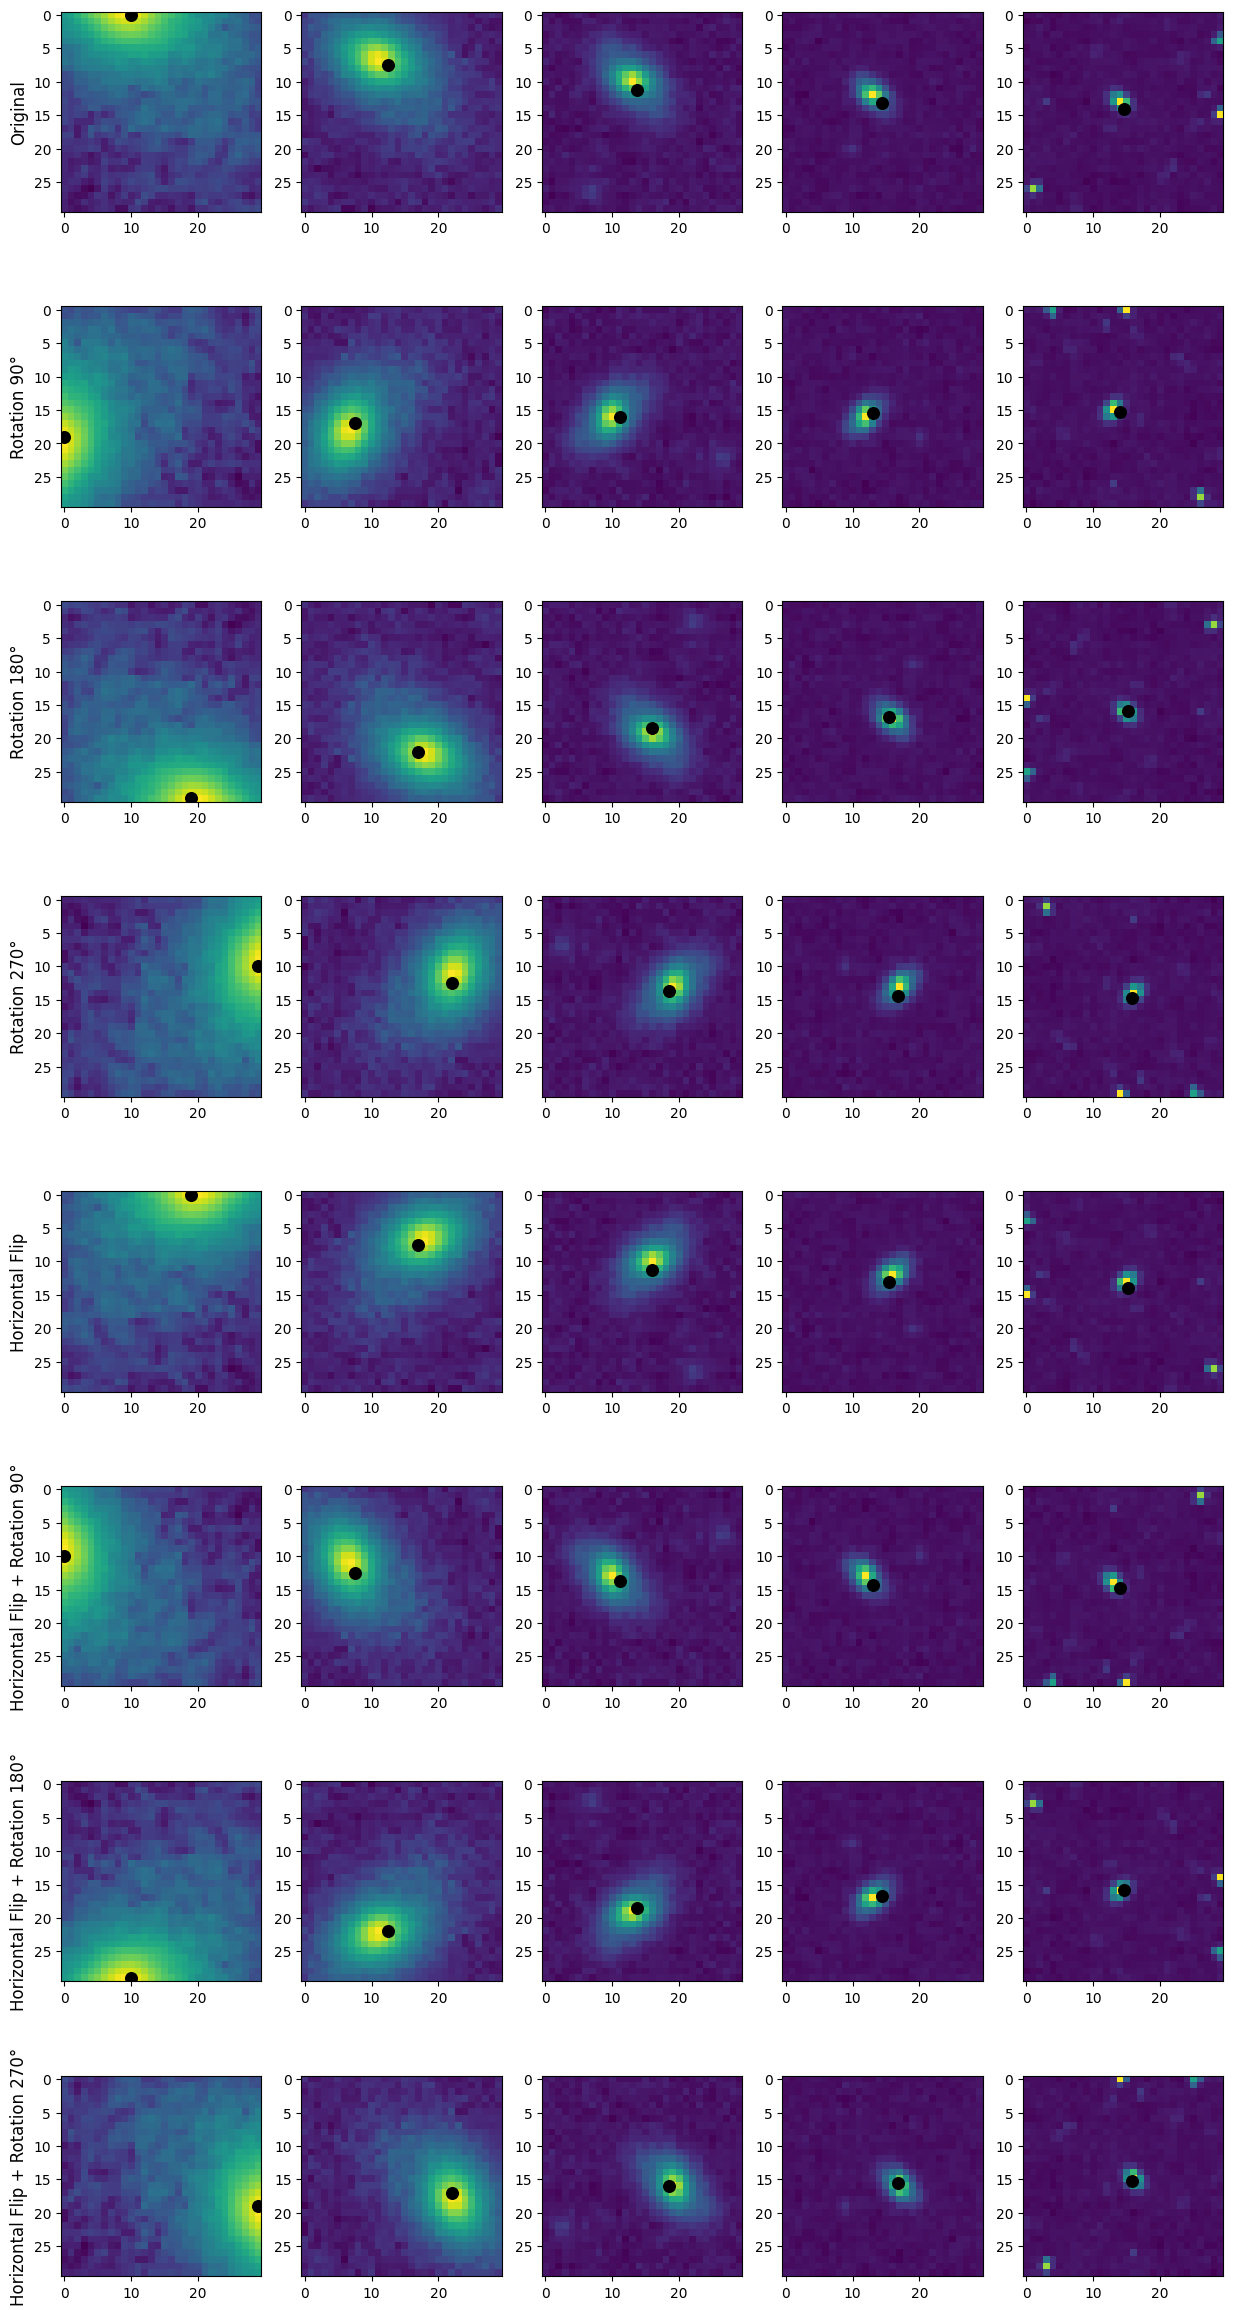

In [8]:
idx = 1
example = dataset_autolabeling[idx]

fig, axs = plt.subplots(8,5, figsize=(15,30))

for pos, trans_name in transformations.items():
    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) +15) , (example[1][pos][1]/(2**m)+15), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()

### Delight

In [9]:
dataset_delight =  DelightClassic(
                                imgs = delight_sersic,
                                sn_pos = df_sersic[["dx","dy"]].values.astype(np.float32) )

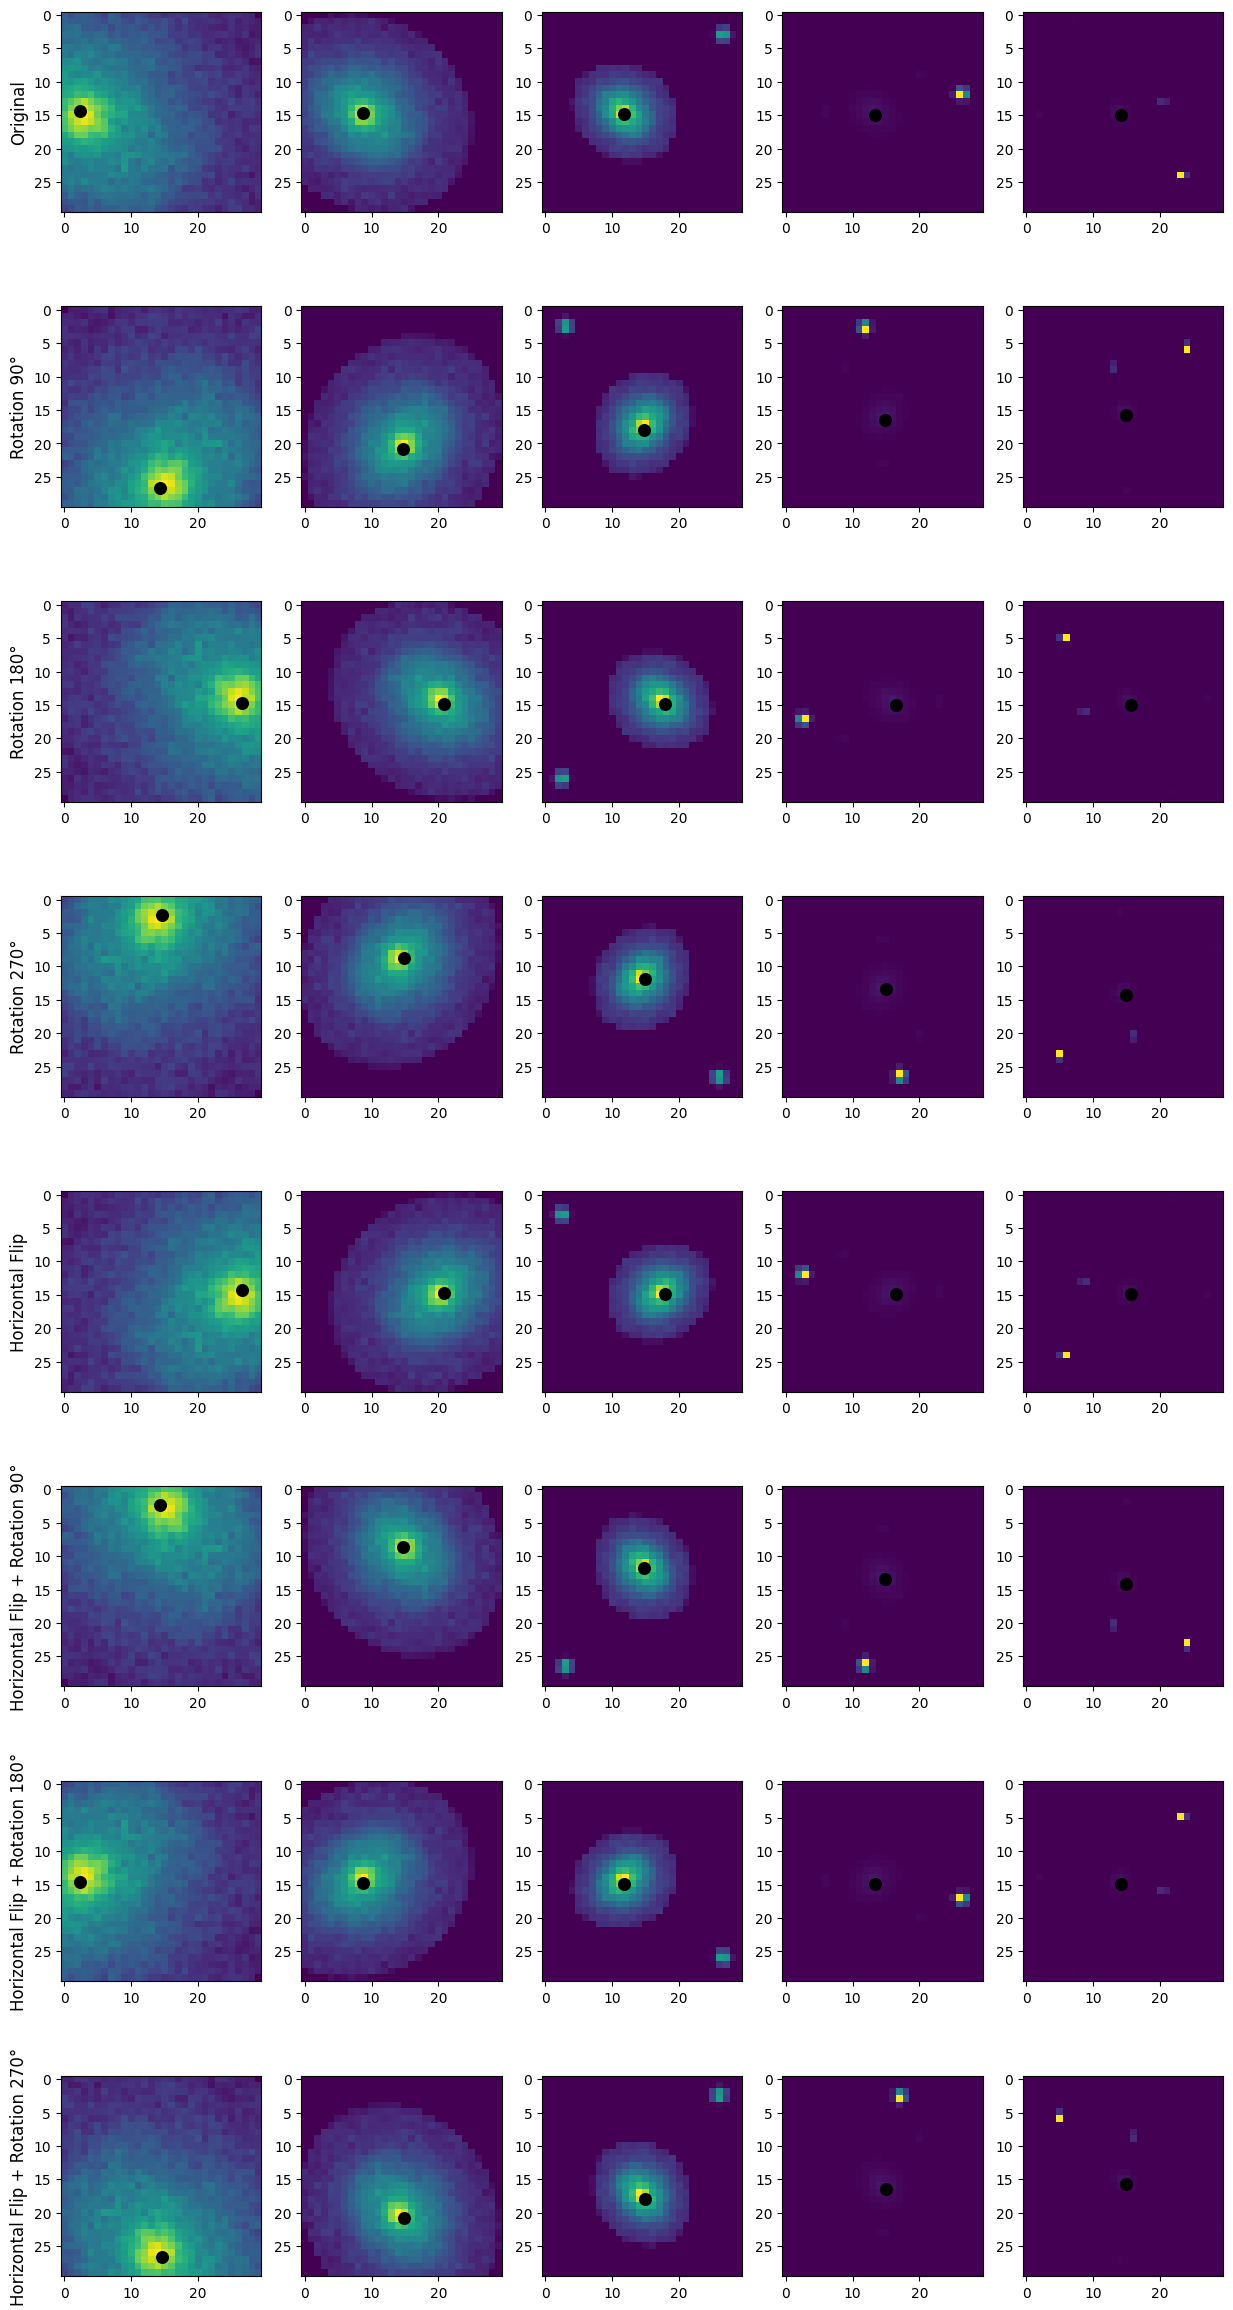

In [10]:
idx = 2
example = dataset_delight[idx]

fig, axs = plt.subplots(8,5, figsize=(15,30))

for pos, trans_name in transformations.items():
    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) +15) , (example[1][pos][1]/(2**m)+15), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)
plt.show()

### Re-center on DELIGHT SN

In [ ]:
dataset_recenter_delight =  DelightAutoLabeling(
                                        imgs = h2f_sersic,
                                        sn_pos = df_sersic[["dx","dy"]].values.astype(np.float32),
                                        sersic_radius = None,
                                        sersic_ab = None,
                                        sersic_phi = None)

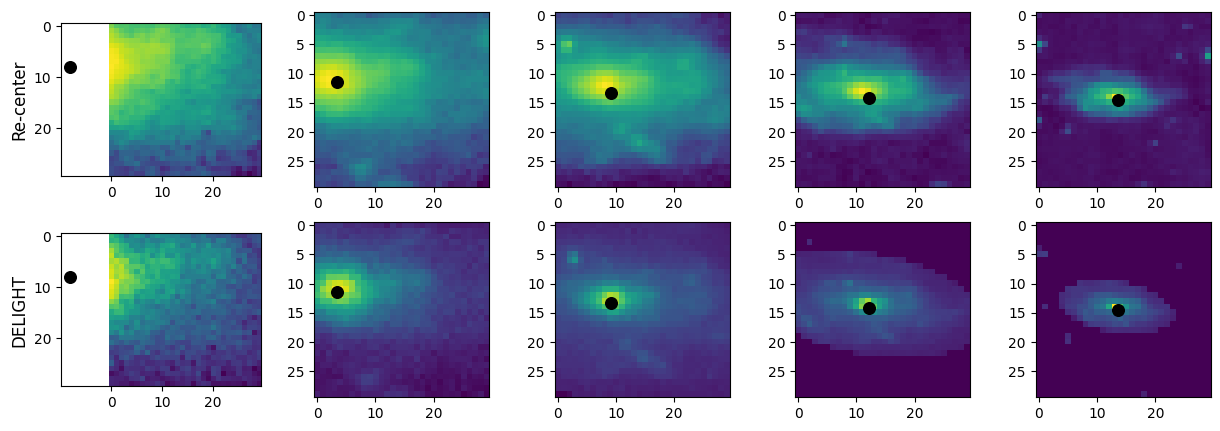

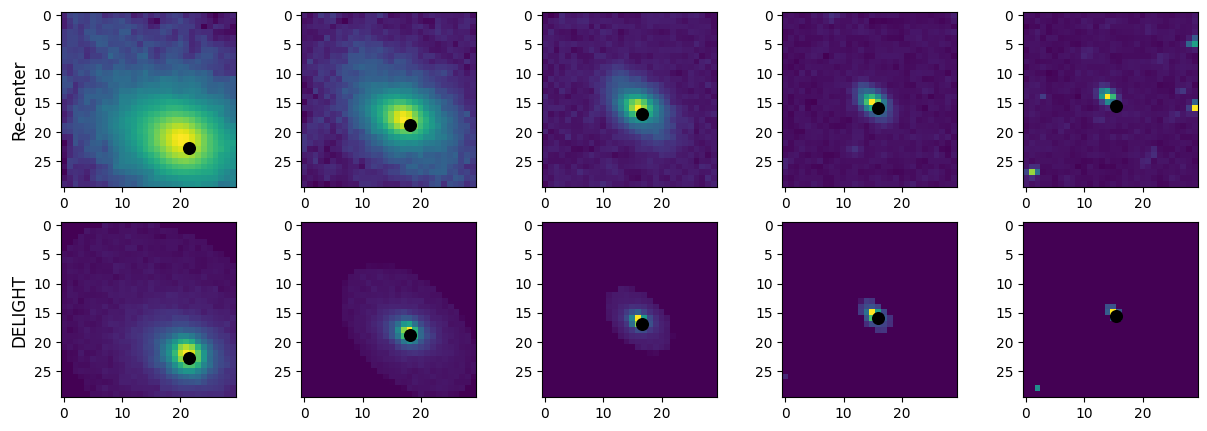

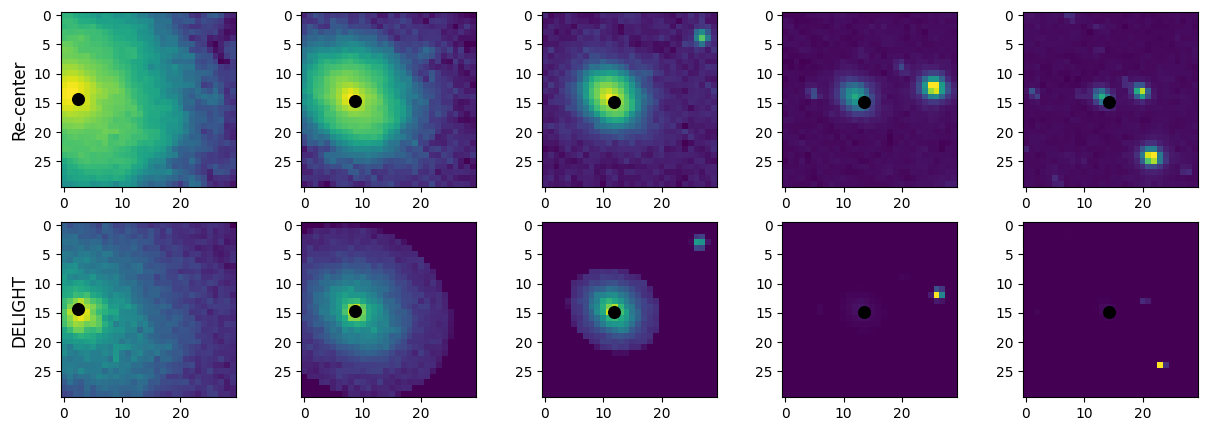

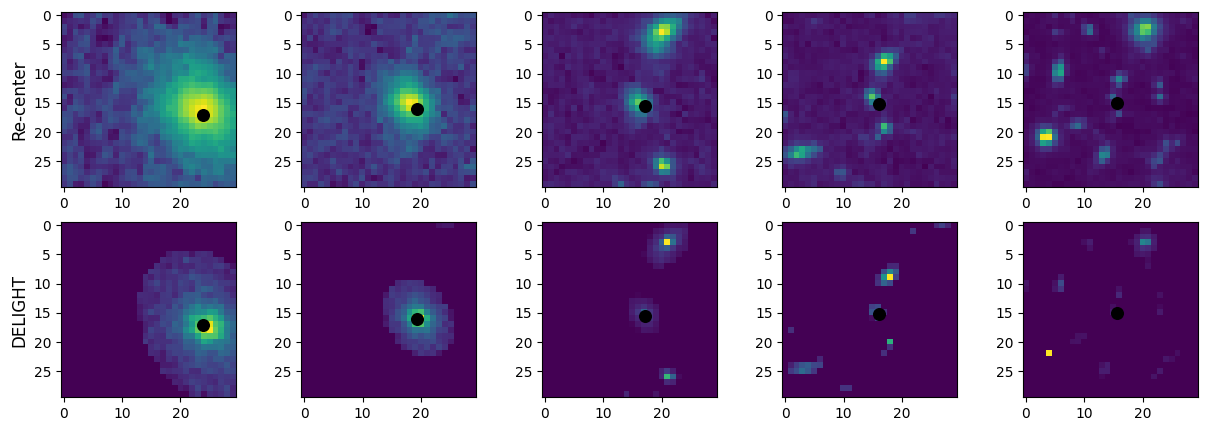

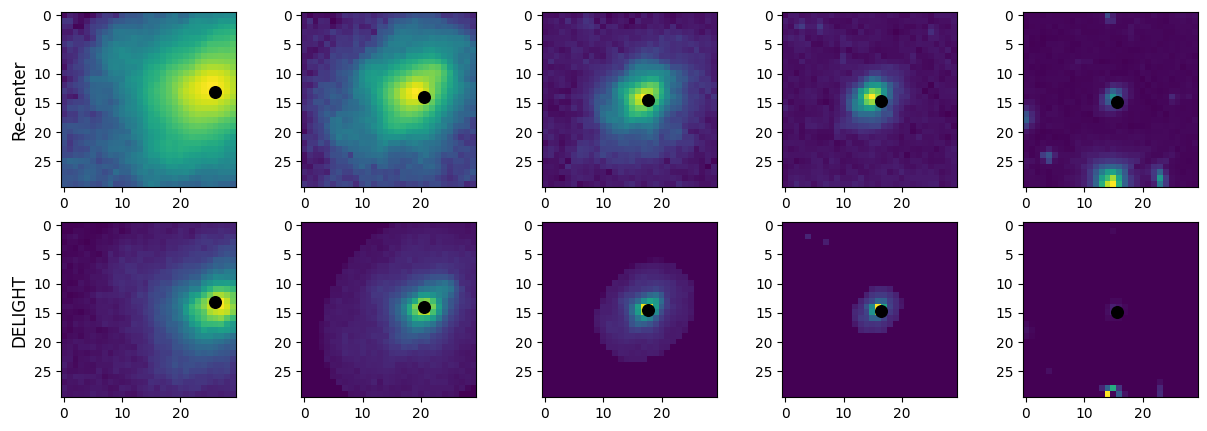

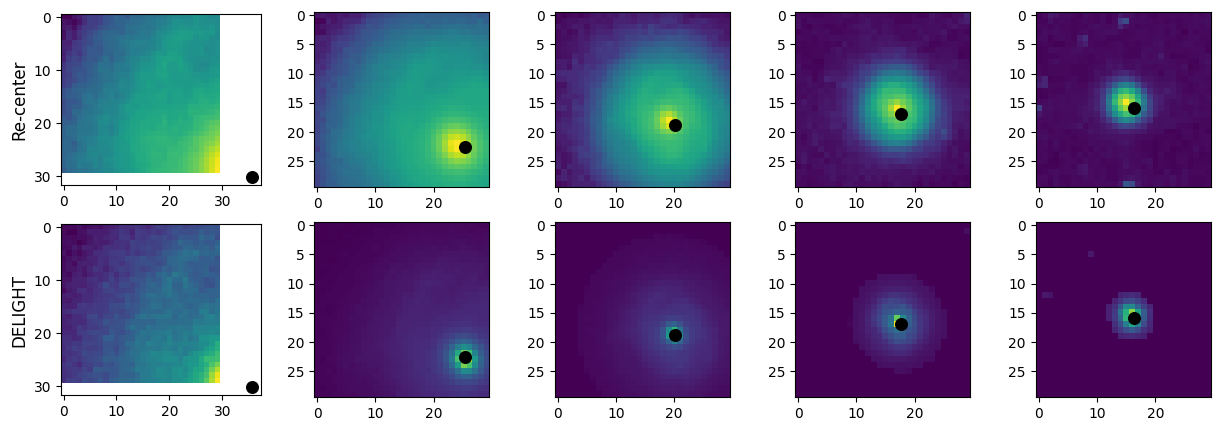

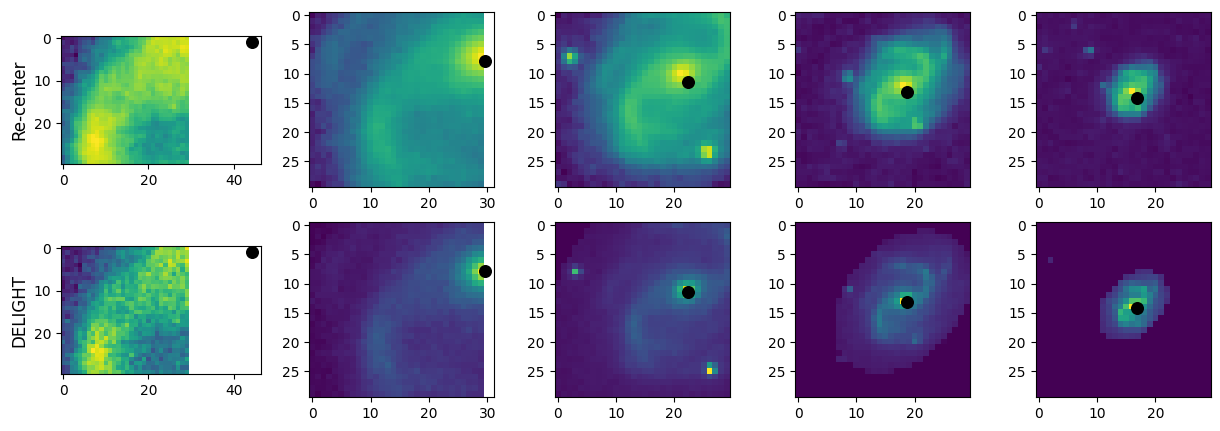

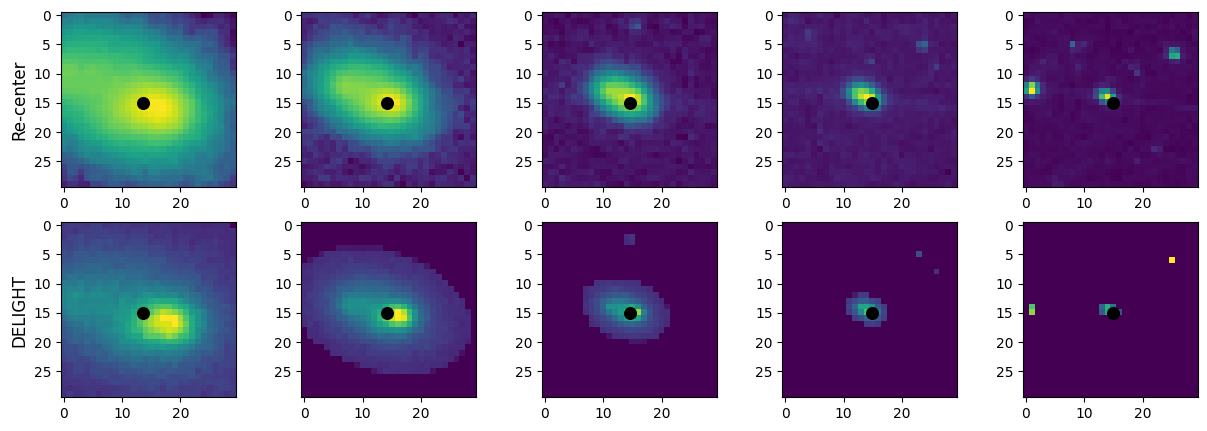

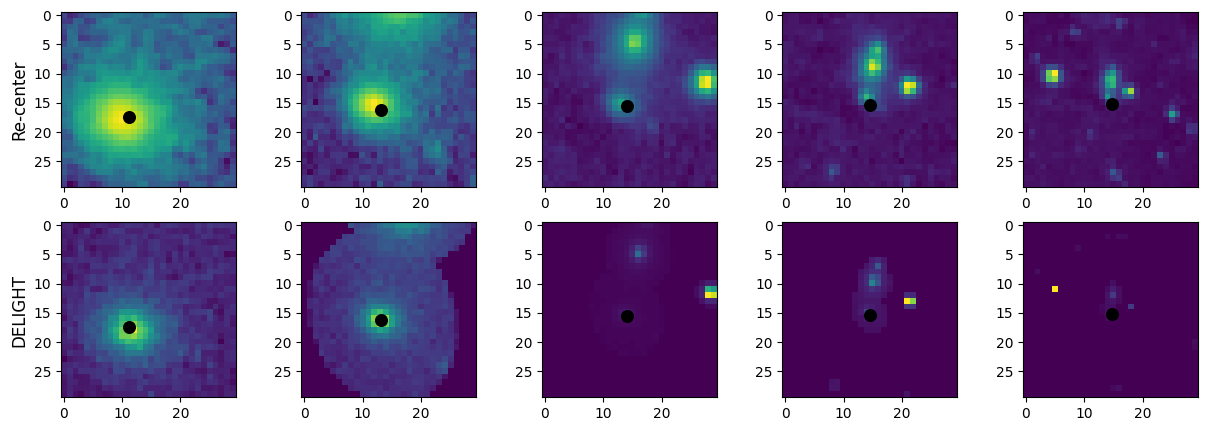

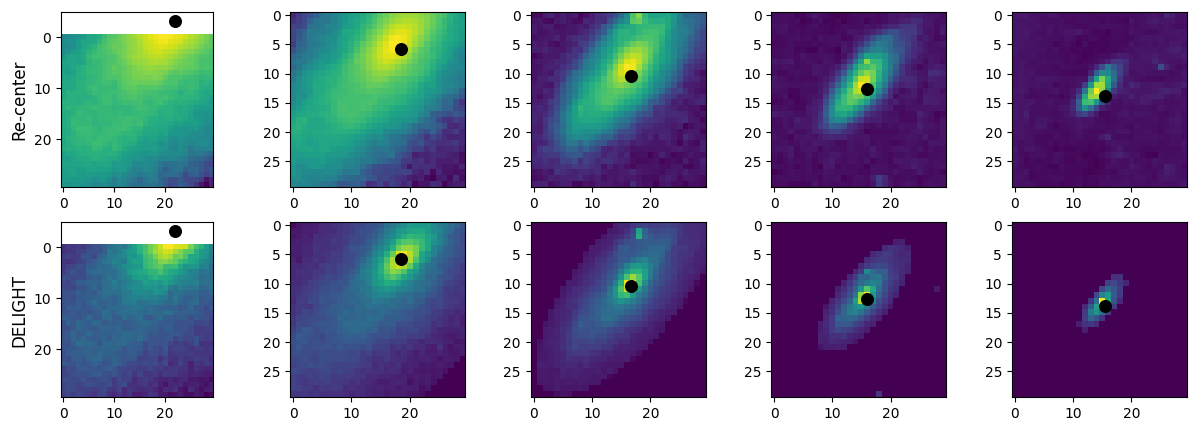

In [12]:
for idx in range(10):

    example_recenter = dataset_recenter_delight[idx]
    example_delight = dataset_delight[idx]

    pos = 0 # Original

    fig, axs = plt.subplots(2,5, figsize=(15,5))

    for m in range(5):
        axs[0][m].imshow(example_recenter[0][pos][m][0])
        axs[0][m].scatter((example_recenter[1][pos][0]/(2**m) +15) , (example_recenter[1][pos][1]/(2**m)+15), s=70, color="black")

        axs[1][m].imshow(example_delight[0][pos][m][0])
        axs[1][m].scatter((example_delight[1][pos][0]/(2**m) +15) , (example_delight[1][pos][1]/(2**m)+15), s=70, color="black")

    axs[0][0].set_ylabel("Re-center", fontsize=12)  # título a la izquierda
    axs[1][0].set_ylabel("DELIGHT", fontsize=12)  # título a la izquierda

    plt.show()